### Predict house prices using the California Housing Dataset.


### 1. Load the dataset and describe its features (e.g., MedInc, HouseAge,AveRooms, etc.).

In [3]:
# 1. Load the dataset and describe features

from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data,columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

### 2. Visualize relationships between features and the target variable (MedHouseVal).

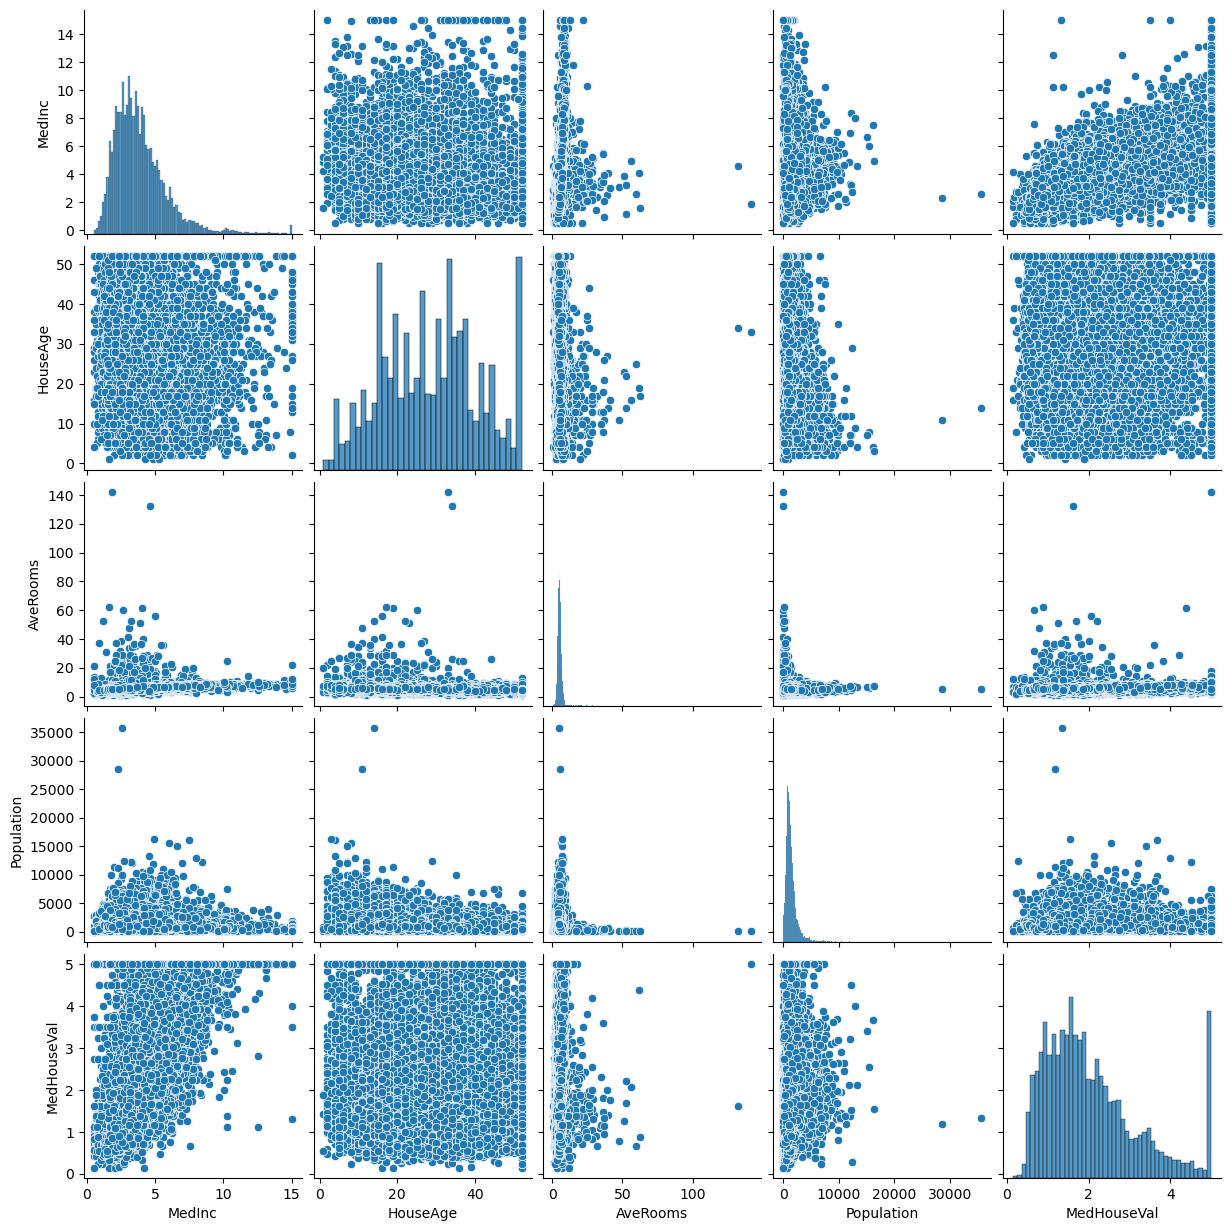

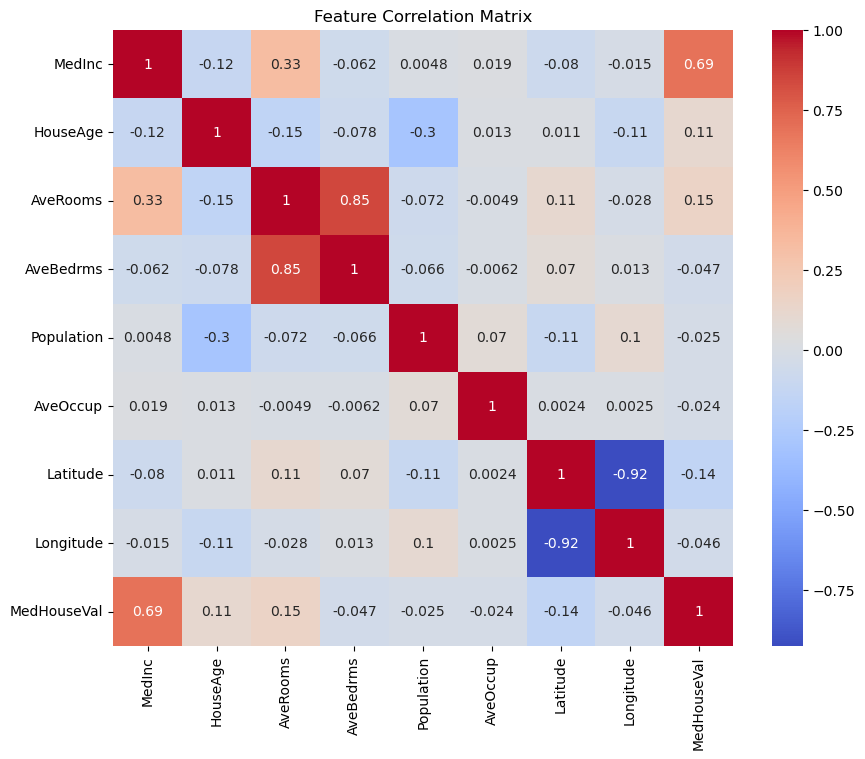

In [6]:
# 2. Visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot (you can comment this if it takes too long)

sns.pairplot(df[['MedInc','HouseAge','AveRooms','Population','MedHouseVal']])
plt.show()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### 3. Check and handle missing values


In [9]:
# 3. Check and handle missing values
print("\nMissing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### 4. Split data into training and testing sets


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

### 5. Normalize/standardize features if needed.


In [16]:
# 5. Normalize/standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Train the model and print the model’s coefficients and intercept.

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled,y_train)

print("Intercept:",model.intercept_)
coeff_df = pd.DataFrame(model.coef_, X.columns,columns=['Coefficient'])
print(coeff_df)

Intercept: 2.0719469373788777
            Coefficient
MedInc         0.854383
HouseAge       0.122546
AveRooms      -0.294410
AveBedrms      0.339259
Population    -0.002308
AveOccup      -0.040829
Latitude      -0.896929
Longitude     -0.869842


### 7. Calculate Mean Squared Error (MSE) and R2 Score on the test set.

In [22]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Sqaured Error (MSE): ",mse)
print("R2 Score:",r2)

Mean Sqaured Error (MSE):  0.5558915986952442
R2 Score: 0.575787706032451
